# Project 12 -- Emilio Pozas

## Question 1

In [2]:
library(data.table)

In [3]:
options(jupyter.rich_display = F)

In [4]:
options(repr.matrix.max.cols = 30, repr.matrix.max.rows = 200)

In [5]:
orders <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [6]:
head(orders$created_at)

[1] "2019-08-01 05:30:16 UTC" "2019-08-01 05:31:10 UTC"
[3] "2019-08-01 05:31:33 UTC" "2019-08-01 05:34:54 UTC"
[5] "2019-08-01 05:35:51 UTC" "2019-08-01 05:37:05 UTC"

In [7]:
table(year(orders$created_at))


 2019  2020 
93795 41508 

In [9]:
table(month(orders$created_at))


    1     2     5     6     7     8     9    10    11    12 
17825 23683     1 10120 10175  8933  6609 19893 18249 19815 

In [10]:
table(wday(orders$created_at))


    1     2     3     4     5     6     7 
18651 19676 22003 20619 22210 15906 16238 

In [17]:
table(substr(orders$created_at,1,7))


2019-05 2019-06 2019-07 2019-08 2019-09 2019-10 2019-11 2019-12 2020-01 2020-02 
      1   10120   10175    8933    6609   19893   18249   19815   17825   23683 

In [18]:
table(paste(year(orders$created_at),month(orders$created_at),sep="-"))


2019-10 2019-11 2019-12  2019-5  2019-6  2019-7  2019-8  2019-9  2020-1  2020-2 
  19893   18249   19815       1   10120   10175    8933    6609   17825   23683 

In [33]:
table(format(orders$created_at, "%m-%Y"))


01-2020 02-2020 05-2019 06-2019 07-2019 08-2019 09-2019 10-2019 11-2019 12-2019 
  17825   23683       1   10120   10175    8933    6609   19893   18249   19815 

## Question 2

In [26]:
tail(sort(table(orders$customer_id)))


2JJAO46 B28LJKM HJFTTGW VDEJEMP TL7Z2DM XW90EAP 
    115     119     128     146     151     262 

In [32]:
sort(table(format(orders$created_at[orders$customer_id == "XW90EAP"],"%m-%Y")), decreasing =TRUE)


06-2019 07-2019 10-2019 08-2019 12-2019 09-2019 01-2020 11-2019 02-2020 
     37      36      34      32      30      28      23      23      19 

## Question 3

In [34]:
table(orders$payment_mode)


     1      2      3      4      5 
104714  22079   1361   6696    453 

In [36]:
table(orders$payment_mode[orders$customer_id == "XW90EAP"])


  1   2   4   5 
 59 188  14   1 

## Question 4

In [38]:
ordersJan2020 <- subset(orders, format(created_at,  "%m-%Y") == "01-2020") 

In [40]:
head(ordersJan2020)

  akeed_order_id customer_id item_count grand_total payment_mode promo_code 
1 319584         JNFE1NC     4          33.9        1                       
2 319585         1HDJHXM     2           6.5        1                       
3 319589         MRONLCP     3          13.3        1                       
4 319591         OX9QRI3     2           9.5        1                       
5 319596         0SL9MNR     1          13.6        1                       
6 319598         4PCXU2K     2           3.5        1            akeed319521
  vendor_discount_amount promo_code_discount_percentage is_favorite is_rated
1 0                      0                              No          No      
2 0                      0                              No          No      
3 0                      0                              No          No      
4 0                      0                              No          No      
5 0                      0                              No          No      

In [41]:
ordersJan2020$day_of_week <- weekdays(ordersJan2020$created_at)

In [42]:
sum_grand_total <- aggregate(grand_total ~ day_of_week, ordersJan2020, sum)

In [43]:
sum_grand_total$day_of_week <- factor(sum_grand_total$day_of_week, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

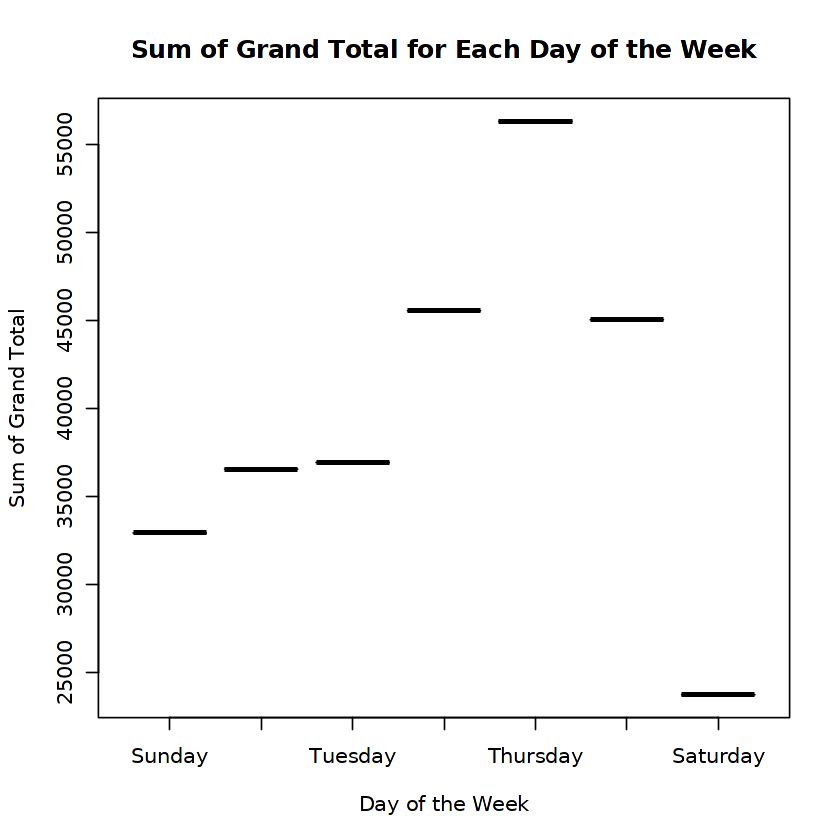

In [47]:
plot(sum_grand_total$day_of_week, sum_grand_total$grand_total, col = "blue", 
     xlab = "Day of the Week", ylab = "Sum of Grand Total",
     main = "Sum of Grand Total for Each Day of the Week")

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.